<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Viernes_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Cartopy

Cartopy es un paquete de Python diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales.

Instalación 

In [2]:
!apt install python3-cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-pkg-resources python3-pyshp python3-shapely python3-six
Suggested packages:
  python3-matplotlib python3-owslib python3-pil python3-pyepsg python3-scipy
  python3-setuptools python-shapely-doc
The following NEW packages will be installed:
  python3-cartopy python3-pkg-resources python3-pyshp python3-shapely
  python3-six
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,570 kB of archives.
After this operation, 10.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-pyshp all 1.2.12+ds-1 [31.5 kB]
Get:3 http://a

**Proyecciones**


PlateCarree (Equirrectangular)

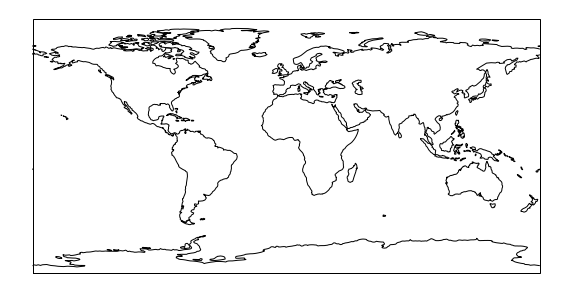

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Mercator

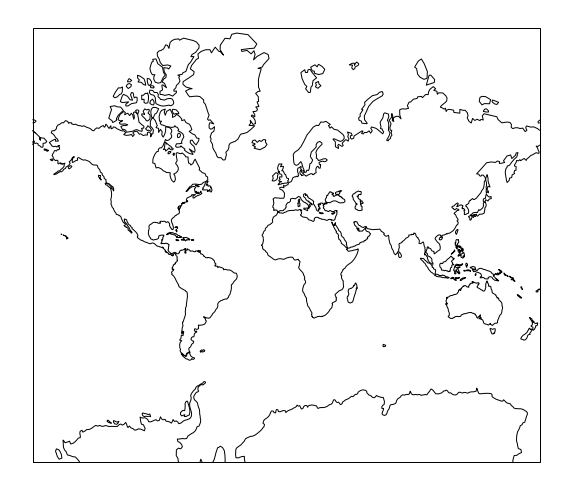

In [8]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

Robinson

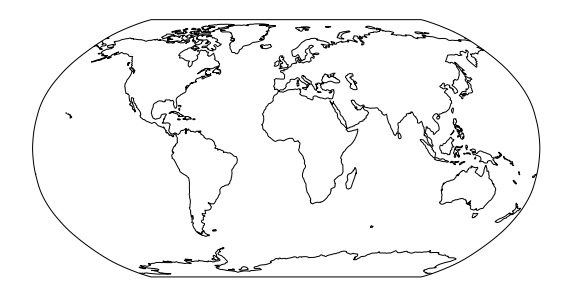

In [12]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

UTM

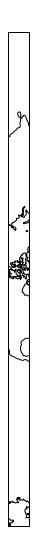

In [13]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.UTM(zone=14))
ax.coastlines()

CCL

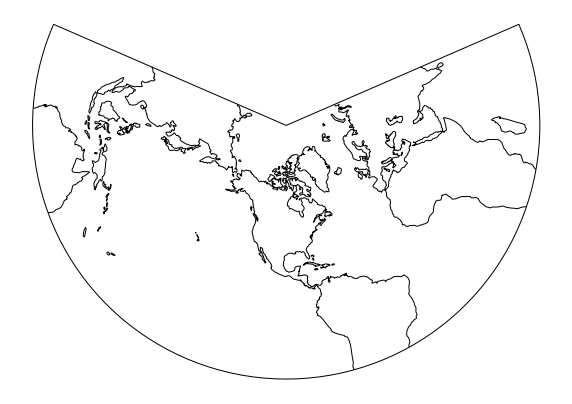

In [15]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines()

Geoestacionario

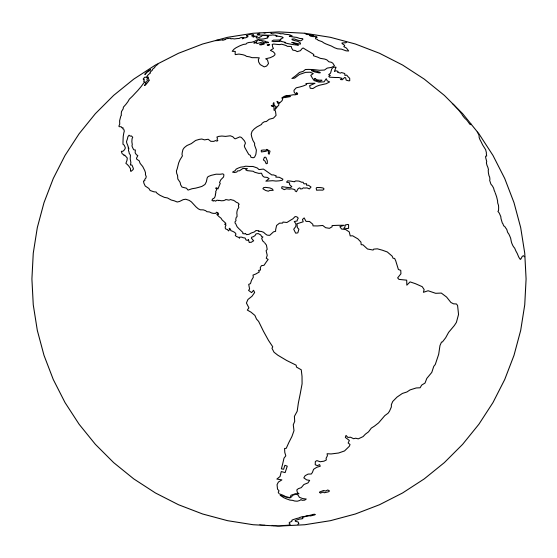

In [34]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75))
ax.coastlines()

Graficacion 

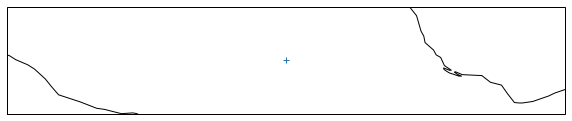

In [39]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.plot(-99,19,'+')

Extención

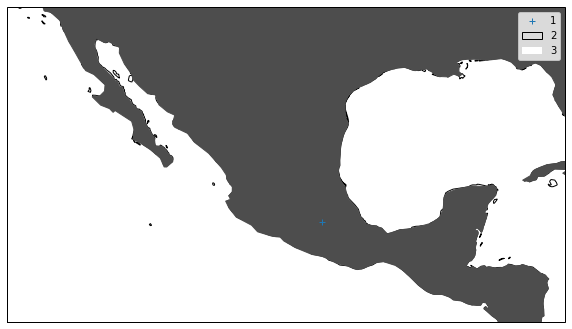

In [289]:
import cartopy.feature as cfeature

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.set_extent([-121,-82, 12, 34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.plot(-99,19,'+')
ax.legend('123')

Geopandas y Cartopy

In [290]:
!pip install geopandas

Apertura y reproyeccion

In [0]:
import geopandas as gpd

agua = gpd.read_file('/content/drive/My Drive/Curso-RV-python/EMCA_DBO_2018/EMCA_DBO5_2018.shp')
agua = agua.to_crs({'init':'epsg:3857'})
rios = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')
rios = rios.to_crs({'init':'epsg:3857'})

In [206]:
agua.crs
rios.crs

{'init': 'epsg:3857'}

Graficacion conjunta

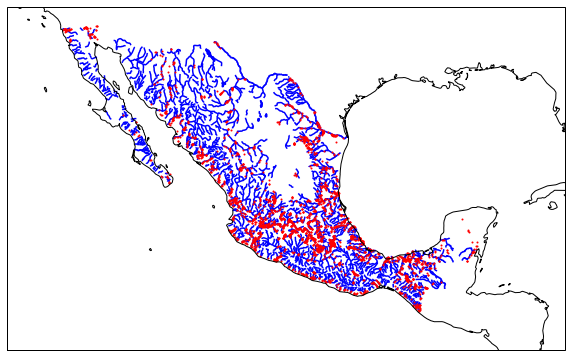

In [207]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-121,-82, 12, 34], crs=ccrs.PlateCarree())
agua.plot(ax=ax, markersize=1, color='r',zorder=1)
rios.plot(ax=ax, markersize=1, color='b',zorder=0)

Extent

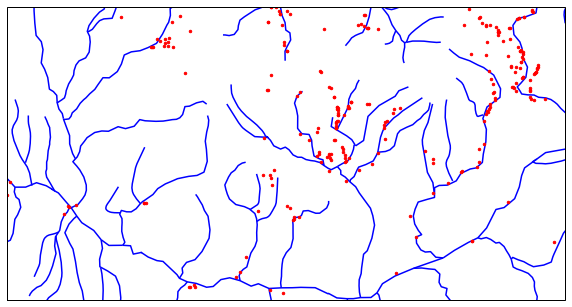

In [208]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
agua.plot(ax=ax, markersize=6, color='r',zorder=1)
rios.plot(ax=ax, markersize=1, color='b',zorder=0)

Diferencia

In [0]:
from geopandas.tools import overlay
from shapely import ops

riosb = rios.buffer(500)
aguab = agua.buffer(10000)
aguab = ops.unary_union(aguab)

symDif = riosb.difference(aguab)

In [293]:
symDif

0                                GEOMETRYCOLLECTION EMPTY
1                                GEOMETRYCOLLECTION EMPTY
2                                GEOMETRYCOLLECTION EMPTY
3                                GEOMETRYCOLLECTION EMPTY
4                                GEOMETRYCOLLECTION EMPTY
                              ...                        
2229    POLYGON ((-12333004.209 2748364.229, -12332994...
2230    POLYGON ((-12318387.080 2726159.218, -12318376...
2231    POLYGON ((-12240047.293 2681138.450, -12240096...
2232    POLYGON ((-12243937.005 2681181.242, -12243985...
2233    MULTIPOLYGON (((-12211290.567 2652882.250, -12...
Length: 2234, dtype: geometry

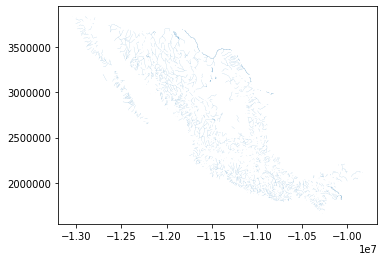

In [294]:
symDif.plot()

Graficacion

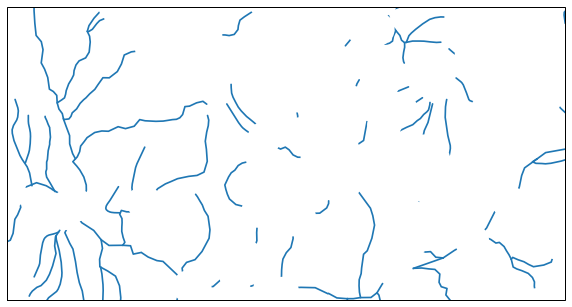

In [295]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-101,-98,18,19.5], crs=ccrs.PlateCarree())
ax.add_geometries(symDif.values, crs=ccrs.Mercator())

In [296]:
symDif

geopandas.geoseries.GeoSeries

Escritura de archivo

In [0]:
symDif = gpd.GeoDataFrame(symDif)
symDif = symDif.rename(columns={0:'geometry'}).set_geometry('geometry')
symDif.to_file('monitoreo.shp',driver='ESRI Shapefile')